In [59]:
from sklearn.datasets import load_iris, load_digits
from sklearn.datasets import fetch_mldata
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [3]:
p = Pipeline((
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C=1, loss="hinge"))))
p.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [4]:
p.predict([[5.5, 1.7]])

array([ 1.])

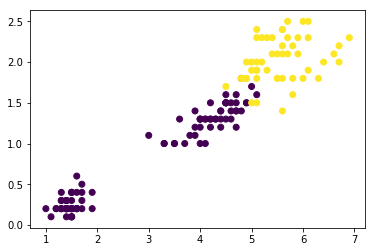

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
def plotBoundary(x, X, y, Y, model):
    xx, yy = np.meshgrid(np.linspace(x, X, 100), np.linspace(y, Y, 100))
    yp = p.predict(np.c_[xx.ravel(), yy.ravel()])
    yp = yp.reshape(xx.shape)
    plt.contour(xx, yy, yp, cmap=plt.cm.Paired)
    #return yp


In [7]:
yp = p.predict(np.c_[xx.ravel(), yy.ravel()])

NameError: name 'xx' is not defined

In [8]:
yp = yp.reshape(xx.shape)

NameError: name 'yp' is not defined

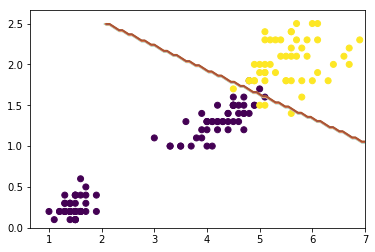

In [9]:
plotBoundary(1, 7, 0, 2.5, p)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
from sklearn.datasets import make_moons

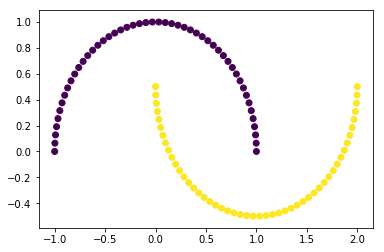

In [12]:
plt.scatter(x[:, 0], x[:, 1], c=y)

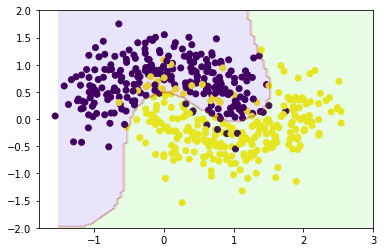

In [46]:
x, y = make_moons(500, noise = 0.3)
p1 = SVC(kernel="rbf", gamma=1, C = 2)
p1.fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c=y)
xx, yy = np.meshgrid(np.linspace(-1.5, 3, 100), np.linspace(-2, 2, 100))
yp = p1.predict(np.c_[xx.ravel(), yy.ravel()])
yp = yp.reshape(xx.shape)
plt.contourf(xx, yy, yp, cmap=plt.cm.brg, alpha=0.1)

In [49]:
mnist = fetch_mldata("MNIST original")
X = mnist["data"]
y = mnist["target"]

In [50]:
Xtrain = X[:60000]

In [51]:
ytrain = y[:60000]

In [52]:
Xtest = X[60000:]
ytest = y[60000:]

In [53]:
np.random.seed(42)

In [56]:
perm = np.random.permutation(60000)
Xtrain = Xtrain[perm]
ytrain = ytrain[perm]
ystrain = []

In [58]:
c1 = LinearSVC()
c1.fit(Xtrain, ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [61]:
yp = c1.predict(Xtest)
accuracy_score(yp, ytest)

0.83320000000000005

In [ ]:
ss = StandardScaler()
Xtrains = .fit_transform(Xtrain)
Xtests = ss.transform(Xtest)

In [ ]:
c1s = LinearSVC()
c1s.fit(Xtrains, ytrain)
yp = c1s.predict(Xtests)
accuracy_score(yp, ytest)

In [ ]:
c2 = SVC(kernel="rbf", gamma=1, C=1)
c2.fit(Xtrain, ytrain)

In [ ]:
yp = c2.predict(Xtest)
accuracy_score(yp, ytest)